# Measuring Simultaneous Change in Two Random Variables

## Introduction 

It is easy to compare two discrete values. One is greater than or equal to the other. It is harder but also more interesting to compare two populations of values. Think about a random variable. You can measure and plot its set of values with a population distribution. The values would spread out in the greater-than direction and in the lesser-than direction away from the mean value. What would it mean to say that this population is the same or different than another population? Some of its values will be bigger than some of the values of the other population but some will be smaller. It might not be possible to directly compare the two populatons value for value. But we could compare the way that the two populations *changed* across their own distributions. If the two populations changed in the same way then they might share a meaningful relationship. Observing and measuring such a relationship may yield insights for a data scientist to present to their organization. In this lesson you will learn how to measure the way that the distributions of two random variables change together using variance, covariance, and correlation.

## Objectives

1. Calculate the variance of the distribution of a random variable based on its standard deviation.
2. Use variance to calculate the covariance of the distributions of two random variables.
3. Normalize covariance to calculate the Pearson correlation of two random variables.
4. Use a correlation matrix to draw insights from a data set of random variables.

## From Standard Deviation ($\sigma$) to Variance ($\sigma^2$)

### The spread on one side of the mean

If the **standard deviation** measures the spread of values away from the mean of a distribution in one direction, then its square, **variance**, measures the spread away in both directions. It tells us how much the data varies from its mean. Let's look at an uncontroversial example: carrot length. Let's assume that carrot length is a normally-distributed random variable, and let's say that the mean length of 1000 carrots in a produce market is 20cm.

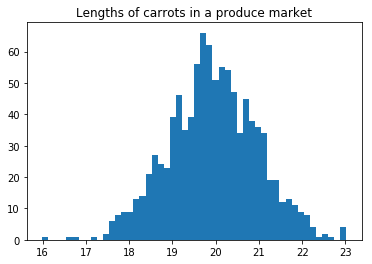

In [2]:
#Mean: carrot length in cm
mu = 20

#Size of population: number of carrots in market
n = 1000

# Random variable, normally-distributed: carrot length
import numpy as np
carrot_lengths = np.random.normal(loc = mu, size = n)

# Plot the distribution
import matplotlib.pyplot as plt
plt.hist(carrot_lengths, bins = 50)
plt.title('Lengths of carrots in a produce market')
plt.show()

The distribution doesn't look *totally* normal; few real-life distributions do. Let's assume it's important to know how many carrots are of average length and how many are extra long or extra short. (Maybe the average-length carrots fit the best in the display bin and the others have to be kept in the back room.) We want to know how many deviate from the standard. Recall the formula for calculating standard deviation:

$$\sigma = \sqrt{\frac{\sum_{i = 1}^n(x_i - \mu)^2}{n}}$$

To get the standard deviation ($\sigma$), we take the difference between each value in the distribution and the mean ($x_i - \mu$), square it, take the sum of all these squares $(\sum)$, divide by the population size ($n$), and take the square root.

This equation translates well into a Pythonic function.

In [3]:
#Function to calculate standard deviation
def find_std(X):
    
    mu = X.mean()
    n = len(X)
    
    sigma = np.sqrt(
                    np.sum(
                                (X - mu)**2 
                           ) / n         
                    )
    return sigma

Let's try calling that function. Remember that the distribution of carrot lengths is normal so we can expect its standard deviation to be 1.

In [4]:
find_std(carrot_lengths) #Should return value very close to 1

1.0044195459917118

Rather than write a function from scratch, the produce market's data scientist could save time by calling the .std() function on a NumPy array.

In [5]:
#Built-in function for NumPy arrays
carrot_lengths.std()

1.0044195459917118

In this normal distribution, 34.1% of the values will lie within 1cm of the mean on one side. That's standard deviation. 

### The spread on both sides of the mean

Now to variance. **Variance** is the spread of the data in the distribution in both directions. It is the standard deviation squared. Its formula is the same as the formula for standard deviation but with the square root knocked off.

$$\sigma^2 = \frac{\sum_{i = 1}^n(x_i - \mu)^2}{n}$$

To get the variance ($\sigma^2$), we take the difference between each value in the distribution and the mean ($x_i - \mu$), square it, take the sum of all these squares ($\sum$), and divide by the population size ($n$).

A from-scratch function to calculate variance would look similar to the $\sigma$ function:

In [6]:
#Function to calculate variance
def find_var(X):
    
    mu = X.mean()
    n = len(X)
    
    variance = np.sum(
                        (X - mu)**2 
                    ) / n         
                    
    return variance

In [7]:
find_var(carrot_lengths)

1.0088586243701962

And you can guess how the built-in NumPy function looks:

In [8]:
carrot_lengths.var()

1.0088586243701962

We've so far looked at a **population distribution**. If we were looking at a **sample distribution**, meaning just a selection of values from a much larger population distribution, we'd make an adjustment to our calculation for variance to eliminate potential 'bias' in the sample. We'd subtract 1 from $n$.

If we're already used to working with the standard deviation, why bother with the variance? One reason to look at variance is if you're concerned about outliers--those super duper long or short carrots. A distribution with extreme outliers will have a *much* higher variance because all those big values get *much* bigger after getting squared than small values do.

Standard deviation is in the same units as the data itself so it is often the better choice when examining one distribution. It becomes less useful when comparing the spread of two or more distributions. That's when variance comes in handy.

### Interpreting variance

Let's look at the variances of a few different distributions.

C:\Users\Stee\Anaconda3good\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


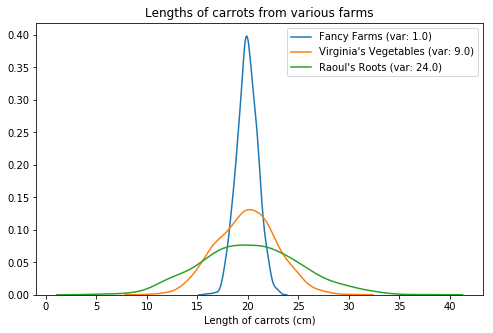

In [4]:
#Another plotting library, a little fancier than matplotlib
import seaborn as sns

#Another distribution of carrot lengths
#(The 'scale' is the standard deviation parameter)
virginias_vegetables = np.random.normal(loc = mu, scale = 3, size = n)

#A third distribution of carrot lengths
raouls_roots = np.random.normal(loc = mu, scale = 5, size = n)

#Draw a figure
fig = plt.figure(figsize = (8,5))
#KDE plots for the three distributions. A KDE plot shows the same 
#'trend' in the data as a histogram but is less cluttered.
sns.kdeplot(carrot_lengths, \
            label = f'Fancy Farms (var: {round(carrot_lengths.var())})')
sns.kdeplot(virginias_vegetables, \
            label = f'Virginia\'s Vegetables (var: {round(virginias_vegetables.var())})')
sns.kdeplot(raouls_roots, \
            label = f'Raoul\'s Roots (var: {round(raouls_roots.var())})')
 
plt.xlabel('Length of carrots (cm)')
plt.legend()
plt.title('Lengths of carrots from various farms')
plt.show()

These three farms could each sell our produce market 1000 carrots with a mean length of 20cm, but how many of the carrots from each farm would actually fit in our display bin? Most of those sold by Fancy Farms would fit because few of them vary from the mean; its variance is low. 68.2% of its carrots are 1cm longer or shorter than the mean. Imagine all the Fancy carrots were stacked up beneath the curve, with the extra-long and extra-short ones rolling off the pile onto the sides. It's easy to see that the higher-variance batches from those other two farms would be less practical for our store to display and sell. 

The extremely high variance for Raoul's carrots compared to Fancy's is a stark warning about the wild variation of his products. They're all over the place. We wouldn't see this as clearly if we just looked at the standard deviations.

In [5]:
print('Standard deviation of carrot lengths from three farms')
print(f'Fancy Farms: {round(carrot_lengths.std())}')
print(f'Virginia\'s Vegetables: {round(virginias_vegetables.std())}')
print(f'Raoul\s Roots: {round(raouls_roots.std())}')

Standard deviation of carrot lengths from three farms
Fancy Farms: 1.0
Virginia's Vegetables: 3.0
Raoul\s Roots: 5.0


5 to 1 doesn't seem like a big difference compared to 25 to 1. The data scientist at the produce market had better tell the procurement specialist about this before they place the next order!

## From Variance ($\sigma^2$) to Covariance ($\sigma_{xy}$)

### Looking for a Relationship

Using variance to compare each farm's carrots on its own merits is useful. What if we wanted to compare them (or other things) to each other more directly? When you're looking for a relationship between two variables, you're looking for a *correlation*. Two correlated variables tend to deviate from their means in a similar way. Correlation does not tell us whether one variable causes the change in the other. You may have heard the classic scientist's admonishment that "correlation is not causation." More on that later.

For now, to understand correlation, we first need to understand covariance. Covariance is a 'raw' measure of how two random variables change together. (You'll see what we mean by 'raw' in a moment.)

The formula for calculating covariance is:

$$\sigma_{x,y} = \frac{\sum_{i = 1}^n(x_i - \mu_x)(y_i - \mu_y)}{n}$$

To get the covariance ($\sigma_{x,y}$), we take the difference between each value in the first distribution and its mean ($x_i - \mu_x$), multiply it by the difference between each value in the second distribution and its mean ($y_i - \mu_y$), take the sum of all these products ($\sum$), and divide by the population size ($n$). The only difference between this equation and the equation for covariance is that we do not square the differences between the first distribution and the mean. Instead, we multiply each of them by the differences of the other distribution and its mean. Other than that, it's the same. All this assumes that both distributions have the same population size.

A from-scratch function to calculate covariance would need to be fed both distributions.

In [12]:
def find_cov(X, Y):
    
    #Make sure both distributions have the same population size
    assert len(X) == len(Y), 'Distributions have different sizes.'
    
    muX = X.mean()
    muY = Y.mean()
    n = len(X)
    
    covariance = np.sum(
                        (X - muX) * (Y - muY)
                    ) / n         
                    
    return covariance

As a baseline, let's find the covariance for a distribution with itself. It should be 1.

In [13]:
find_cov(carrot_lengths, carrot_lengths)

1.0088586243701962

This should be equal to the variance of that distribution.

In [15]:
find_cov(carrot_lengths, carrot_lengths) == find_var(carrot_lengths)

True

Of course, the point of covariance is to compare two different distributions. Let's look at a few.

### Interpreting Covariance

What kinds of covariance might we see?

A **positive covariance** shows that higher-than-average values of one random variable tend to change together with higher-than-average values of the other variable. If you were to plot the two variables against each other, you'd see a trend line rising upward and to the right.

A **negative covariance** shows that lower-than-average values of one random variable tend to change together with lower-than-average values of the other variable. In a plot of the two variables, you'd see the trend line falling downward and to the right.

A covariance close 0 to suggests no relationship between the way the two variables change. A plot of these two variables would lack a trend line.


Text(0.5,1,'Positive covariance')

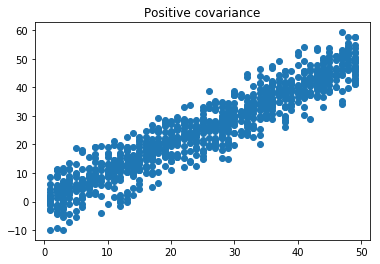

In [16]:
#Draw a plot to show positive covariance

#Toy data: 1000 random numbers between 1 and 50
X = np.random.randint(1, 50, 1000)

#1000 slightly different numbers
Y = X + (np.random.randint(-15, 15, 1000) * np.random.random(1000))

plt.scatter(X, Y)
plt.title('Positive covariance')

In [17]:
pos_covar = find_cov(X, Y)
pos_covar

196.91572277941066

As with the previous measures, there's a NumPy function for finding covariance. It returns an array with a bit more information than we need, so we'll extract just the number we want:

In [18]:
np.cov(X, Y)[0][1] #Should be the same as or very close to the above value

197.11283561502566

Text(0.5,1,'Negative covariance')

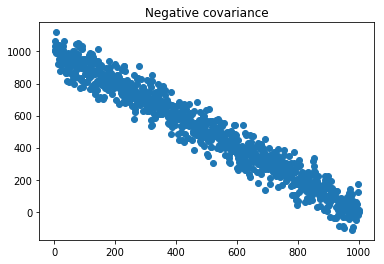

In [19]:
#Draw a plot to show negative covariance

#Toy data: numbers 1 through 1000
X2 = np.arange(1, 1001, 1)
#Similar numbers, going the other way
Y2 = np.flip(X2) + (np.random.randint(-200, 200, 1000) * np.random.random(1000))
plt.scatter(X2, Y2)
plt.title('Negative covariance')

In [20]:
neg_covar = find_cov(X2, Y2)
neg_covar

-82999.79883939483

Text(0.5,1,'Little or nocovariance')

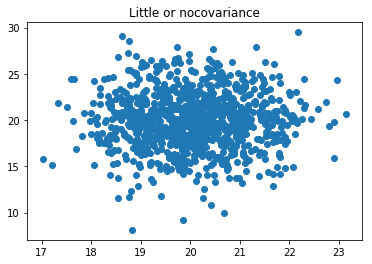

In [21]:
#Draw a plot to show no covariance
plt.scatter(carrot_lengths, virginias_vegetables)
plt.title('Little or nocovariance')

In [22]:
no_covar = find_cov(carrot_lengths, virginias_vegetables)
no_covar

0.06200657016095579

In [23]:
print('Comparing covariances')
print('A positive covariance:', pos_covar)
print('A negative covariance:', neg_covar)
print('A lack of covariance:', no_covar)

Comparing covariances
A positive covariance: 196.91572277941066
A negative covariance: -82999.79883939483
A lack of covariance: 0.06200657016095579


So what do we do with the number that covariance gives us? Not much, it turns out. Aside from noting whether the number is positive, negative, or close to zero, it's difficult to glean any insights from this measure. The number could be anything from negative infinity to positive infinity. Indeed our measure for positive covariance is a much smaller number than the absolute value of our measure for negative covariance. Does that mean that one is somehow much more negative than the other? It doesn't: they're simply measuring different units. Covariance gives us a number which is 'raw', meaning it hasn't been adjusted or scaled in a way to render it useful for making comparisons. But gaining an understanding of covariance helps us to understand correlation, a more useful measure of how two random variables change together.

## From Covariance to Correlation
### The Correlation Coefficient
If only we could normalize the raw results of covariance to make comparisons among pairs of distributions. Good news! We can. There are a few different ways. You may encounter correlation under these names:

- Pearson correlation
- Kendall's Tau
- Spearman's Rank
- Point-biserial

**Pearson correlation** is the most common and it's the version we'll use here. (Just note that the other kinds may come up once in a while in your work.) The number returned by a Pearson correlation operation is called the **correlation coefficient**, $r$. This number will always be between -1, a perfectly negative correlation, and 1, a perfectly positive correlation. Recall from our covariance plots above that the negative trend sloped downward and to the right while the positive trend sloped upward and to the right. In a correlation plot, $r$ would indicate these same trends.

Pearson correlation works under a few assumptions:
1. It assumes that both variables are normally distributed;
2. that the relationship between the two variables will be **linear**, not a curve;
3. and that the data will be **homoscedastic**, meaning its variance will stay consistent across the distribution, not increase or decrease in a big way.

With all that in mind, we're ready to work with the formula for Pearson correlation. 

$$r_{x,y} = \frac{\sigma_{X,Y}}{\sigma_X\sigma_Y}$$

To calculate Pearson correlation $(r_{x,y})$, divide the covariance of two random variables $(\sigma_{X,Y})$ by the product of their standard deviations $({\sigma_X\sigma_Y})$.

You may also see it represented this way, but it amounts to the same thing. (Divide the covariance of two random variables by the square root of the product of their variances.)

$$r_{x,y} = \frac{\sigma_{X,Y}}{\sqrt{\sigma_X^2\sigma_Y^2}}$$

A function in Python for the formula could build upon our earlier function for covariance:

In [24]:
def find_corr(X, Y):
    
    correlation = find_cov(X, Y) / (X.std() * Y.std())
    
    return correlation

In [25]:
#Should have a perfect positive correlation
find_corr(carrot_lengths, carrot_lengths)

0.9999999999999998

In [26]:
#Should have very little correlation
find_corr(carrot_lengths, virginias_vegetables)

0.02064875470394102

### Interpreting Correlation

Let's say we've heard anecdotally that customers at our market are often impressed by the bright orange color of Fancy's carrots. We've also heard occasional disparaging remarks about the listless color of carrots from the other farms. What if color and length are correlated? That would be useful to know. We ask the farm for their data about the 1000 carrots they shipped to us. It's up to us to interpret it.

NumPy's correlation functions aren't as straightforward as their functions for standard deviation, variance, &c., so we won't introduce them here. But you can use Pandas to find correlation.

In [27]:
import pandas as pd

#Toy data: brightness of color of each carrot from Fancy Farms.
#(Ideal brightness is at the mean.)
brightness = (carrot_lengths / (5 + np.random.random(1000)))

#Extra toy data from the farm: dampness of the soil from which the 
#carrot was pulled. 50 is normal dampness; 100 is sodden; 0 is dry.
dampness = np.random.normal(loc = 50, scale = 25, size = n)

#Smush together our three arrays into a new array of 1000 rows, 3 columns
data = np.array([carrot_lengths, brightness, dampness]).T
#Get columns labels
columns = ['Carrot_Length', 'Color Brightness', 'Soil Dampness']
#Build a dataframe to compare carrot attributes
carrots = pd.DataFrame(data = data, columns = columns) 

In [28]:
carrots.head()

,Carrot_Length,Color Brightness,Soil Dampness
0,19.607370,3.627511,38.524763
1,20.694412,3.836016,51.394334
2,19.266200,3.336614,33.216526
3,21.642041,4.151662,48.101295
4,19.767936,3.512885,46.868621


There's all our useful carrot data. To find the correlation among these  variables, we call .corr() on the Pandas DataFrame.

In [29]:
carrots.corr()

,Carrot_Length,Color Brightness,Soil Dampness
Carrot_Length,1.000000,0.684959,0.000049
Color Brightness,0.684959,1.000000,-0.006384
Soil Dampness,0.000049,-0.006384,1.000000


This gives us a **correlation matrix**. Pandas calculates the correlation of each cell's row with its column using the same formula as ours. If you've worked with heat maps then this may be familiar: the correlation matrix supplies the numbers to a heat map to show the strength of relationships between variables using color gradation.

We see that the diagonal cells in the matrix have $r$ values of 1. They show the correlation of each variable with itself. We then see that carrot length and color brightness have a high $r$ value while soil dampness has a very low $r$ with both of them. Length is correlated to brightness of color. We could infer that carrots that grow to the ideal length will grow into their ideal color. If they grow too long the color might get too dark. Those that don't finish growing may not develop their full color. This is an intuitive conclusion but when it is borne out by data it becomes an 'actionable insight' that a data scientist can present to their organization. The carrots from Fancy Farms are consistent in their length and color, with fewer funny-looking outliers, and they're easier for us to display and sell. (It was nice of the farm to send us the data on soil dampness but it looks like it doesn't have a relationship with length.)

### Summary

As you can see, **correlation** can reveal essential insights about data, and not just carrot data. You'll use correlation in many ways as a data scientist: to decide which features to include and exclude in regression models, to grade the performance of classification models, and so on. Correlation allows us to compare the change between two random variables because it is normalized to a universal scale. It is built upon **covariance**, a raw measure of the similarity in the change between two variables which is itself built upon **variance**, the spread of data across the distribution of one random variable. Variance is the square of **standard deviation**, a measure of the spread of data in one direction away from the mean of the distribution of a random variable. We'll continue looking at properties of random variables in the next lesson.